In [4]:
#%pip install matplotlib
#%pip install seaborn
#%pip install scikit-learn

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

### Objective

Use the fish dataset to predict the weight of the fish based on various features.

In [5]:
fishURL= "https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S24/main/regression/data/Fish.csv"
#"https://github.com/WHPAN0108/BHT-DataScience-S24/blob/main/regression/data/Fish.csv"

#### Features:

- **Species**: The species name of the fish.
- **Length1**: Vertical length in cm.
- **Length2**: Diagonal length in cm.
- **Length3**: Cross length in cm.
- **Height**: Height in cm.
- **Width**: Diagonal width in cm.
- **Weight**: Weight of the fish in grams (g).

### Data Preparation

- Clean the dataset if necessary before analysis. 
  - Since the dataset is small, i used excel to have a look at it.
    - Turns out, there is a row with a weight of 0 (line 42) - i'll remove it.

In [6]:
fishData = pd.read_csv(fishURL, delimiter=',')
fishData = fishData.drop(fishData[fishData["Weight"] == 0].index)
# fishData.count() - one row is removed
fishData.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,400.847468,26.293038,28.465823,31.280380,8.986790,4.424232
std,357.697796,10.011427,10.731707,11.627605,4.295191,1.689010
min,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,121.250000,19.150000,21.000000,23.200000,5.940600,3.398650
50%,281.500000,25.300000,27.400000,29.700000,7.789000,4.277050
75%,650.000000,32.700000,35.750000,39.675000,12.371850,5.586750
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000




### Task 1

1. Split the dataset randomly into training (70%) and testing (30%) sets. 

In [7]:
# we don't want the model to be confused by the name of the species, so we remove it.
fishDataSpecies = fishData["Species"]
fishDataWithoutSpecies = fishData.drop(columns=["Species"])

# we separate the weights into the y ("results") field
fishDataWeights = fishData["Weight"]
fishDataWithoutWeights = fishDataWithoutSpecies.drop(columns=["Weight"])

splitted = train_test_split(fishDataWithoutWeights, fishDataWeights, test_size=0.3)
trainInput = splitted[0]
testInput = splitted[1]
trainResults = splitted[2]
testResults = splitted[3]


2. Apply the following models:
   - Linear Regression 

In [8]:
linearModel = LinearRegression()
linearModel.fit(trainInput, trainResults)

linearPredictions = linearModel.predict(testInput)
linearPredictions

linearResults = testInput.copy()
linearResults["PredictedWeight"] = linearPredictions
linearResults["ActualWeight"] = testResults

linearResults

,Length1,Length2,Length3,Height,Width,PredictedWeight,ActualWeight
118,36.6,39.0,41.3,12.4313,7.3514,851.277350,820.0
149,10.7,11.2,12.4,2.0832,1.2772,-184.078570,9.8
158,13.8,15.0,16.2,2.9322,1.8792,-86.718694,19.9
58,28.5,31.0,34.0,10.7440,6.5620,556.632065,540.0
155,11.7,12.4,13.5,2.4300,1.2690,-153.970947,13.4
1,24.0,26.3,31.2,12.4800,4.3056,374.048513,290.0
75,15.0,16.2,17.2,4.5924,2.6316,18.226733,51.5
72,7.5,8.4,8.8,2.1120,1.4080,-250.629145,5.9
156,12.1,13.0,13.8,2.2770,1.2558,-147.278315,12.2
100,23.5,25.6,27.0,6.5610,4.2390,296.589136,197.0


   - Random Forest 

In [9]:
randomforestModel = RandomForestRegressor()
randomforestModel.fit(trainInput, trainResults)

randomForestPredictions = randomforestModel.predict(testInput)
randomForestPredictions

randomForestResults = testInput.copy()
randomForestResults["PredictedWeight"] = randomForestPredictions
randomForestResults["ActualWeight"] = testResults

randomForestResults

,Length1,Length2,Length3,Height,Width,PredictedWeight,ActualWeight
118,36.6,39.0,41.3,12.4313,7.3514,866.800000,820.0
149,10.7,11.2,12.4,2.0832,1.2772,9.408000,9.8
158,13.8,15.0,16.2,2.9322,1.8792,29.754000,19.9
58,28.5,31.0,34.0,10.7440,6.5620,640.680000,540.0
155,11.7,12.4,13.5,2.4300,1.2690,10.746000,13.4
1,24.0,26.3,31.2,12.4800,4.3056,324.230000,290.0
75,15.0,16.2,17.2,4.5924,2.6316,61.100000,51.5
72,7.5,8.4,8.8,2.1120,1.4080,9.008000,5.9
156,12.1,13.0,13.8,2.2770,1.2558,12.885000,12.2
100,23.5,25.6,27.0,6.5610,4.2390,200.100000,197.0


3. Calculate RMSE (Root Mean Squared Error) and R2
 (Coefficient of Determination) on the test set. 

In [10]:
linearMSE = math.sqrt(mean_squared_error(testResults, linearPredictions))
linearR2 = r2_score(testResults, linearPredictions)
print(f"Linear Regression: RMSE: {linearMSE}, r²: {linearR2}")

randomForestMSE = math.sqrt(mean_squared_error(testResults, randomForestPredictions))
randomForestR2 = r2_score(testResults, randomForestPredictions)
print(f"Random Forest: RMSE: {randomForestMSE}, r²: {randomForestR2}")

Linear Regression: RMSE: 114.65473339460566, r²: 0.8998281588118127
Random Forest: RMSE: 81.56874325729234, r²: 0.9492998527203013


4. Visualize the predictions by plotting y_pred vs y_real and compare the performance of the models.

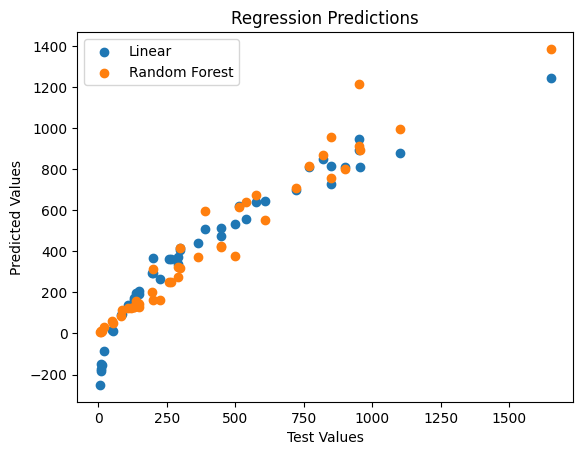

In [11]:
# one plot to compare both
plt.scatter(testResults, linearPredictions)
plt.scatter(testResults, randomForestPredictions)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('Regression Predictions')
plt.legend(["Linear", "Random Forest"])
plt.show()

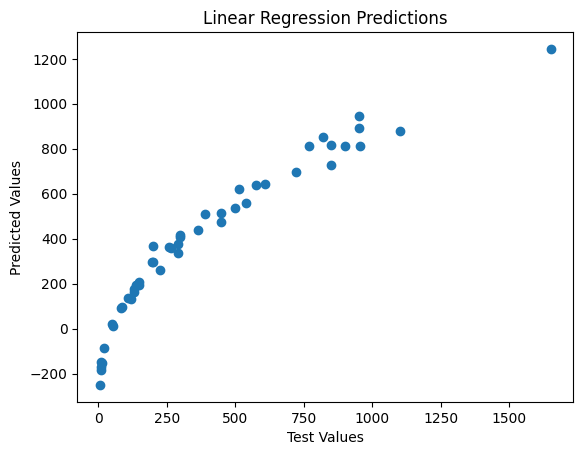

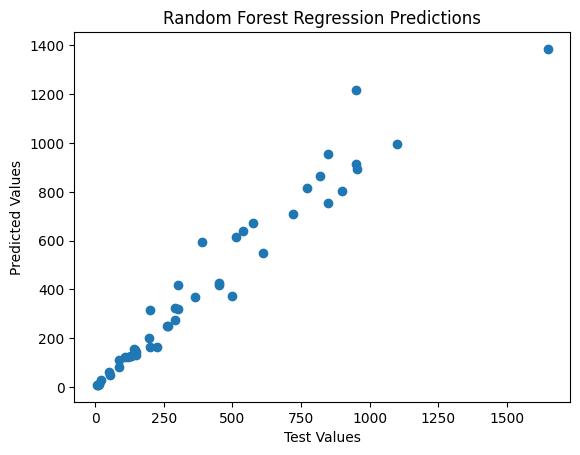

In [12]:

# individual plots for linear and random forest
plt.scatter(testResults, linearPredictions)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')
plt.show()

plt.scatter(testResults, randomForestPredictions)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression Predictions')
plt.show()


5. Provide your opinion on which metric, RMSE or R2, is more appropriate in this case.


The R² test is more appropriate, since both the variance and distribution of the widths need to be considered to evaluate if a RMSE value of e.g. 100 value is good or bad, whereas aiming for a an R² value closest to 1.0 is far easier.




### Task 2

1. Change the training-test split to ensure that each species has 70% of its samples in the training set and 30% in the test set.

In [13]:
# we can reuse the cleaned fishData variables from above

# it is apparently sufficient to specify a strata value for the split method. this yields a stratified split:
# Species   Train   Test    Ratio = Test / (Train + Test)
# ------------------------------------------------
# Bream     24      11      0,314285714
# Parkki    8       3       0,272727273
# Perch     39      17      0,303571429
# Pike      12      5       0,294117647
# Roach     13      6       0,315789474
# Smelt     10      4       0,285714286
# Whitefish 4       2       0,333333333

splittedSp = train_test_split(fishDataWithoutSpecies, fishDataWeights, test_size=0.3, stratify=fishData['Species'])
trainInputSp = splittedSp[0]
testInputSp = splittedSp[1]
trainResultsSp = splittedSp[2]
testResultsSp = splittedSp[3]

2. Repeat steps 2, 3, 4, from Task 1.

Linear Regression [stratisfied by Species]: RMSE: 6.5558583430948e-14, r²: 1.0
Random Forest [stratisfied by Species]: RMSE: 35.182562962413165, r²: 0.9899717357158948


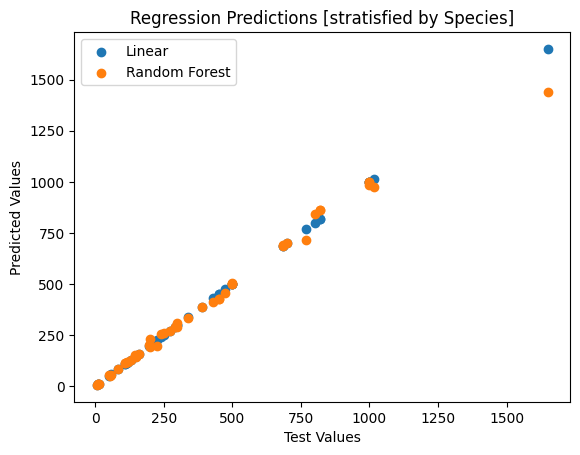

In [14]:
# linear results stratisified by Species

linearModelSp = LinearRegression()
linearModelSp.fit(trainInputSp, trainResultsSp)

linearPredictionsSp = linearModelSp.predict(testInputSp)
linearPredictionsSp

linearResultsSp = testInput.copy()
linearResultsSp["PredictedWeight"] = linearPredictionsSp
linearResultsSp["ActualWeight"] = testResultsSp

linearResultsSp

# random forest results stratified by Species
randomforestModelSp = RandomForestRegressor()
randomforestModelSp.fit(trainInputSp, trainResultsSp)

randomForestPredictionsSp = randomforestModelSp.predict(testInputSp)
randomForestPredictionsSp

randomForestResultsSp = testInput.copy()
randomForestResultsSp["PredictedWeight"] = randomForestPredictionsSp
randomForestResultsSp["ActualWeight"] = testResultsSp

randomForestResultsSp

linearMSESp = math.sqrt(mean_squared_error(testResultsSp, linearPredictionsSp))
linearR2Sp = r2_score(testResultsSp, linearPredictionsSp)
print(f"Linear Regression [stratisfied by Species]: RMSE: {linearMSESp}, r²: {linearR2Sp}")

randomForestMSESp = math.sqrt(mean_squared_error(testResultsSp, randomForestPredictionsSp))
randomForestR2Sp = r2_score(testResultsSp, randomForestPredictionsSp)
print(f"Random Forest [stratisfied by Species]: RMSE: {randomForestMSESp}, r²: {randomForestR2Sp}")

# one plot to compare both
plt.scatter(testResultsSp, linearPredictionsSp)
plt.scatter(testResultsSp, randomForestPredictionsSp)
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.title('Regression Predictions [stratisfied by Species]')
plt.legend(["Linear", "Random Forest"])
plt.show()




### Comparison

- Compare the results obtained from Task 1 and Task 2.


In [18]:
print(f"Metrics Results:")
print(f"  Linear Regression: RMSE: {linearMSE :.4f}, r²: {linearR2:.4f}")
print(f"  Random Forest: RMSE: {randomForestMSE:.4f}, r²: {randomForestR2:.4f}")
print()
print(f"  Linear Regression [stratisfied by Species]: RMSE: {linearMSESp:.4f}, r²: {linearR2Sp:.4f}")
print(f"  Random Forest [stratisfied by Species]: RMSE: {randomForestMSESp:.4f}, r²: {randomForestR2Sp:.4f}")

Metrics Results:
  Linear Regression: RMSE: 114.6547, r²: 0.8998
  Random Forest: RMSE: 81.5687, r²: 0.9493

  Linear Regression [stratisfied by Species]: RMSE: 0.0000, r²: 1.0000
  Random Forest [stratisfied by Species]: RMSE: 35.1826, r²: 0.9900



The Task2 results look much better than the ones created in Task 1.

The metrics are improved, too, getting both R² values to 1.0 or very close, respectively.
The RSMEs get very low, too.

This stresses that the relationship between length and weight is a rather simple linear regressable function (see square-cube law), when the data is sufficiently uniform.

Making sure that all species of fish (which have way different proportions) are represented in the test data, accordingly, is massively helpful for the linear regression model. As can be seen on the scatter plot, the linear regression sometimes is even better than the random forest model at predicting the very high values. This emphasizes the importance of having homogenous sample data, because machine learning models sometimes overextend outliers.

### Extra Point

- point out which parameters can be adjusted in this exercise to improve model performance. (dont need to run analysis again)